In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'salary-datacsv:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1129548%2F1895596%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240709%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240709T044412Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D201e90b57be0900d683475ce1eb152c9adef96ec6c8ec60c3d42c998ee14fbe9d32b34314b625c8adfd40e6c43870eb965f9e1ea495cab3954447469c50a16a382dd43025d3b019b0a44f86a3b3c022e24e091d6f00b374d4aab1db81c9d7352b33f5df7d36447c5b34f57665660ffaef5086912d08996ce38cab86fe90fe42221f73f129c53f63516627b151f99cbecace7909d63781ce222f1ffb092b999621ff483905259b6ccab5ee4fa3f7546eef3edcf738db9397a26095d6fba6f5b76525d5e87a88ae3fcf0a9d5a4adfce4e797c581ffcfd4a092d39b4b54924506dfdf49371ff2c9d71f94e3b7b6150680ae988197122b9be659c24fe8c9ccd6f5b2'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 378 bytes downloaded
Downloaded and uncompressed: salary-datacsv
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-datacsv/Salary_Data.csv


In [3]:
#importing libraries
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

In [4]:
#importing the dataset
dataset = pd.read_csv('Salary_Data.csv')

x = dataset.iloc[:, :-1].values

y = dataset.iloc[:, 1].values

In [5]:
#splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

In [8]:
#fitting smple linear regression to the training set
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(x_train, y_train)

LinearRegression()

In [9]:
#predicting the test set result
y_pred = regressor.predict(x_test)

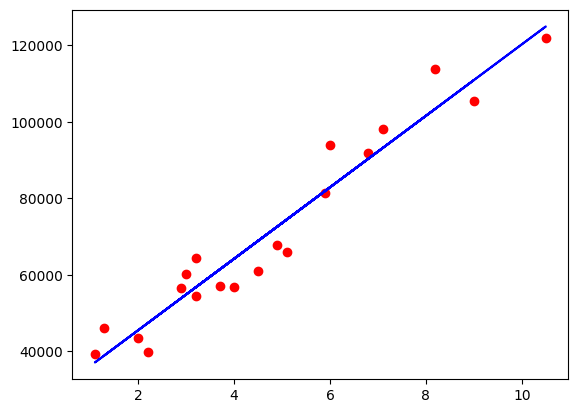

In [10]:
#visualizing the training set result
plt.scatter(x_train, y_train, color = 'red')

plt.plot(x_train, regressor.predict(x_train), color = 'blue')

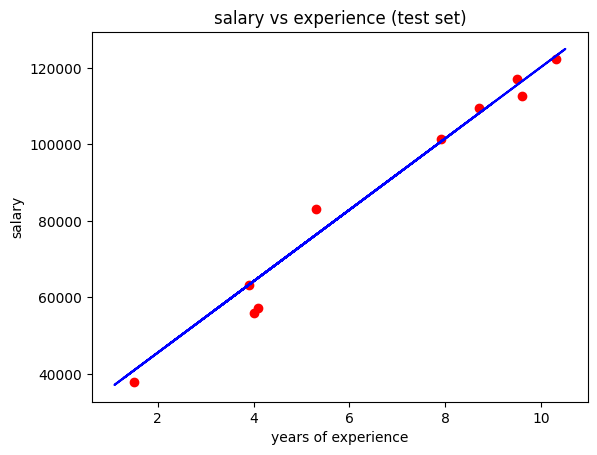

In [13]:
#visualizing the test set result
plt.scatter(x_test, y_test, color = 'red')

plt.plot(x_train, regressor.predict(x_train), color = 'blue')

plt.title("salary vs experience (test set)")

plt.xlabel('years of experience')

plt.ylabel('salary')

plt.show()